## Text Classification
In this notebook we will exploring text classification to find out the category of words a particular text falls.
For instance if a document belong to the category classes of __Emails__, __News__, __Sports__, __Computer__ etc and then use tf-idf to formulate a feature vector to match each text category. We will be using the 20newsgroups dataset from sklearn


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# fetch dataTelevision, Microwave all use electricit
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups()

In [22]:
#view target category
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can define our categorical map to filter out only the categorical features we are interested in classifying by mapping only to thee email, religion, computer etc as stated above, however we can train on the entire category to make our prediction more robust.

In [27]:
# mapping all categories
category_map = ['alt.atheism','comp.graphics',
               'comp.os.ms-windows.misc',
               'comp.sys.ibm.pc.hardware',
               'comp.sys.mac.hardware',
               'comp.windows.x',
               'misc.forsale',
               'rec.autos',
               'rec.motorcycles',
               'rec.sport.baseball',
               'rec.sport.hockey',
               'sci.crypt',
               'sci.electronics',
               'sci.med',
               'sci.space',
               'soc.religion.christian',
               'talk.politics.guns',
               'talk.politics.mideast',
               'talk.politics.misc',
               'talk.religion.misc']

# define train data
train = fetch_20newsgroups(subset='train', categories=category_map, shuffle=True, random_state=5)

# define test set
test = fetch_20newsgroups(subset='test', categories = category_map)

In [6]:
print(train.data[5])

From: des@helix.nih.gov (David E. Scheim)
Subject: Re: Burzynski's "Antineoplastons"
Organization: NIH
Lines: 58

In article <jschwimmer.123.735362184@wccnet.wcc.wesleyan.edu> jschwimmer@wccnet.wcc.wesleyan.edu (Josh Schwimmer) writes:

>I've recently listened to a tape by Dr. Stanislaw Burzynski, in which he 
>claims to have discovered a series naturally occuring peptides with anti-
>cancer properties that he names antineoplastons.  Burzynski says that his 
>work has met with hostility in the United States, despite the favorable 
>responses of his subjects during clinical trials.

>What is the generally accepted opinion of Dr. Burzynski's research?  He 
>paints himself as a lone researcher with a new breakthrough battling an 
>intolerant medical establishment, but I have no basis from which to judge 
>his claims.  Two weeks ago, however, I read that the NIH's Department of 
>Alternative Medicine has decided to focus their attention on Burzynski's 
>work.  Their budget is so small that

In [28]:
# impoort libraries for training our text classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [29]:
# wrap tdf vectrorizer and model into a pipeline for tansforming and fitting on training data
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [30]:
# we transform input test data before using tfid vectrorizer so we can apply predict function
labels = model.predict(test.data) 

Text(157.74, 0.5, 'Predicted Label')

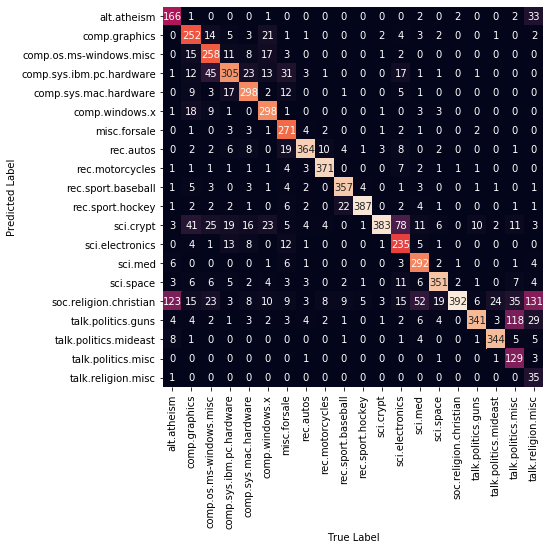

In [32]:
# check confusion matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(test.target, labels)
plt.figure(figsize=(10,7))
sns.heatmap(cf.T, square=True, annot=True, fmt='d',cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)

#display viz
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [56]:
# create prediction function
def predict_category(i, train=train, model=model):
    pred = model.predict([i])
    return train.target_names[pred[0]]

###### samples

In [52]:
# create new sample data for prediction
input_data = [
    'ALL Christians are religious',
    'Puck is a disk made of rubber',
    'Discovery was a space shuttle',
    'Television, Microwave all use electricity'
]

In [50]:
predict_category('ALL Christians are religious')

'soc.religion.christian'

In [58]:
predict_category('Puck is a disk made of rubber')

'rec.sport.hockey'

In [59]:
predict_category('Discovery was a space shuttle')

'sci.space'

In [60]:
predict_category('Television, Microwave all use electricit')

'sci.electronics'